# Optimization in Pytorch

SGD (Stochastic Gradient Descent): torch.optim.SGD

Adam: torch.optim.Adam

AdamW: torch.optim.AdamW

Adagrad: torch.optim.Adagrad

Adadelta: torch.optim.Adadelta

RMSprop: torch.optim.RMSprop

LBFGS (Limited-memory BFGS): torch.optim.LBFGS

ASGD (Averaged Stochastic Gradient Descent): torch.optim.ASGD

NAdam: torch.optim.NAdam

Rprop (Resilient Backpropagation): torch.optim.Rprop

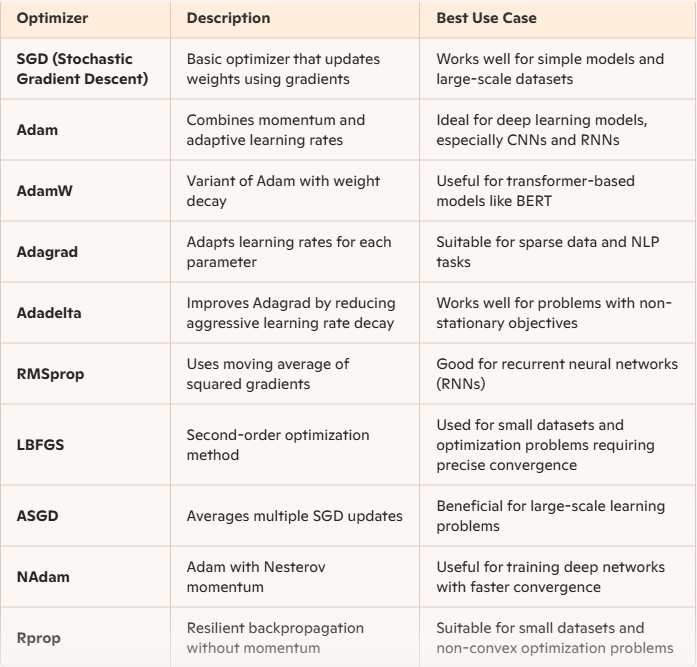

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

# Initialize the model
model = Net()

# Define a loss function
criterion = nn.CrossEntropyLoss()

# Define different optimizers
optimizers = {
    "SGD": optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    "Adam": optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999)),
    "Adagrad": optim.Adagrad(model.parameters(), lr=0.01),
    "Adadelta": optim.Adadelta(model.parameters(), rho=0.9),
    "RMSprop": optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)
}

# Sample input and target
input_tensor = torch.randn(1, 784)
target = torch.tensor([3])  # Example target class

# Compute gradients for each optimizer
for name, optimizer in optimizers.items():
    optimizer.zero_grad()  # Reset gradients
    output = model(input_tensor)  # Forward pass
    loss = criterion(output, target)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print gradient norms for comparison
    grad_norm = sum(p.grad.norm().item() for p in model.parameters() if p.grad is not None)
    print(f"{name}: Gradient Norm = {grad_norm:.4f}")


SGD: Gradient Norm = 0.8381
Adam: Gradient Norm = 0.8326
Adagrad: Gradient Norm = 0.8130
Adadelta: Gradient Norm = 0.0000
RMSprop: Gradient Norm = 0.0000
